In [1]:
import pandas as pd
%matplotlib inline

In [87]:
df  = pd.read_csv("./sample.csv",header=None,parse_dates=[0])
df.head()

,0,1
0,2014-12-14 03:00:00,0
1,2014-12-14 03:00:00,0
2,2014-12-14 04:00:00,0
3,2014-12-14 04:00:00,0
4,2014-12-14 05:00:00,0


In [88]:
df.dtypes

0    datetime64[ns]
1             int64
dtype: object

In [89]:
df.set_index(0,inplace=True)
df.head()

,1
0,
2014-12-14 03:00:00,0
2014-12-14 03:00:00,0
2014-12-14 04:00:00,0
2014-12-14 04:00:00,0
2014-12-14 05:00:00,0


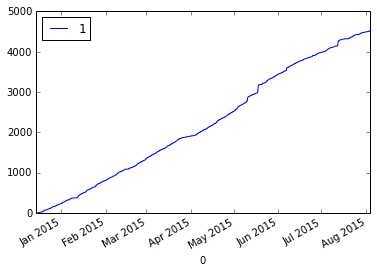

In [90]:
df.plot()

In [91]:
df['diff'] = df.diff()

In [52]:
x = "sdsa"
type(x)

str

In [122]:
county = pd.read_csv("../national_county.csv",header=None,names=["state","id1","id2","county","id3"] ,dtype={"state":str,"id1":str,"id2":str,"county":str,"id3":str})
county.columns=["state","id1","id2","county","id3"]
# county.apply(lambda x : str(x["id1"]))
county["merged_index"] = county.id2 + county.id1
county.head()
# county.shape
county = county.groupby("merged_index").first()
print county.head()
print county.shape

             state id1  id2           county id3
merged_index                                    
00101           AL  01  001   Autauga County  H1
00104           AZ  04  001    Apache County  H1
00105           AR  05  001  Arkansas County  H1
00106           CA  06  001   Alameda County  H1
00108           CO  08  001     Adams County  H1
(3235, 5)


In [123]:
df = pd.read_csv("/home/sri/Downloads/cb_2013_us_county_500k.csv",dtype={"countyfp":str,"statefp":str})
df["merged_index"] = df.countyfp+df.statefp
df = df.groupby("merged_index").first()
df.head()
df.shape

(3234, 9)

In [119]:
len(df.merged_index.unique())

3234

In [127]:
df.groupby(["statefp","countyfp"]).count("geoid")['geoid'].head()
geo_county_map = df.merge(county,how='inner',right_index=True,left_index=True)
print geo_county_map.shape
geo_county_map.head()


(3234, 14)


,cartodb_id,the_geom,geoid,affgeoid,cd113fp,countyfp,statefp,updated_at,created_at,state,id1,id2,county,id3
merged_index,,,,,,,,,,,,,,
00101,1250,0106000020E61000000100000001030000000100000079...,102001,5101300US0102001,2,001,01,2015-02-24,2015-02-24,AL,01,001,Autauga County,H1
00104,1243,0106000020E610000001000000010300000001000000C1...,401001,5101300US0401001,1,001,04,2015-02-24,2015-02-24,AZ,04,001,Apache County,H1
00105,481,0106000020E610000001000000010300000001000000EA...,501001,5101300US0501001,1,001,05,2015-02-24,2015-02-24,AR,05,001,Arkansas County,H1
00106,513,0106000020E61000000100000001030000000100000047...,613001,5101300US0613001,13,001,06,2015-02-24,2015-02-24,CA,06,001,Alameda County,H1
00108,2638,0106000020E61000000200000001030000000100000062...,804001,5101300US0804001,4,001,08,2015-02-24,2015-02-24,CO,08,001,Adams County,H1


In [128]:
geo_county_map["county_state_map"] =  geo_county_map.county + ', ' + geo_county_map.state

In [132]:
data = pd.read_csv("../final_data_set.csv")
data.shape

(9802, 459)

In [130]:
merged_data_geo = data.merge(geo_county_map,how='inner',left_on='County',right_on='county_state_map')


In [136]:
pwd

u'/home/sri/Downloads/Data for Diploams_Unmerged Data'

In [131]:
merged_data_geo.shape
merged_data.col

(9726, 474)

In [133]:
merged_data_geo.

,Unnamed: 0,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,...,countyfp,statefp,updated_at,created_at,state,id1,id2,county,id3,county_state_map
0,0,100005,ALABAMA,1,Albertville City,268,83,0,NaN,0,...,095,01,2015-02-24,2015-02-24,AL,01,095,Marshall County,H1,"Marshall County, AL"
1,1,100006,ALABAMA,1,Marshall County,424,79,2,PS,1,...,095,01,2015-02-24,2015-02-24,AL,01,095,Marshall County,H1,"Marshall County, AL"
2,5,100012,ALABAMA,1,Boaz City,155,90-94,0,NaN,3,...,095,01,2015-02-24,2015-02-24,AL,01,095,Marshall County,H1,"Marshall County, AL"
3,10,100100,ALABAMA,1,Arab City,190,90-94,2,PS,3,...,095,01,2015-02-24,2015-02-24,AL,01,095,Marshall County,H1,"Marshall County, AL"
4,63,101690,ALABAMA,1,Guntersville City,135,85-89,1,PS,3,...,095,01,2015-02-24,2015-02-24,AL,01,095,Marshall County,H1,"Marshall County, AL"


In [137]:
merged_data_geo[][0:9000].to_csv("full_geo_map_cleaned_data.csv")

In [49]:
data[["leaid11","leanm11","STNAM",u'FIPST',"County",u'IDCENSUS',u'state_state_abb']].head()

,leaid11,leanm11,STNAM,FIPST,County,IDCENSUS,state_state_abb
0,100005,Albertville City,ALABAMA,1,"Marshall County, AL",1.504840e+12,"('AL', 'alabama')"
1,100006,Marshall County,ALABAMA,1,"Marshall County, AL",1.504800e+12,"('AL', 'alabama')"
2,100007,Hoover City,ALABAMA,1,"Jefferson County, AL",1.503740e+12,"('AL', 'alabama')"
3,100008,Madison City,ALABAMA,1,"Madison County, AL",1.504530e+12,"('AL', 'alabama')"
4,100011,Leeds City,ALABAMA,1,"Jefferson County, AL",1.503710e+12,"('AL', 'alabama')"


In [48]:
data.County.fillna(method='bfill',inplace=True)
sum(data.County.isnull())

0

In [63]:
for row in data.iterrows():
    x = row
    county = row.County.split(',')[0]
    state = row.state_state_abb[0]
    match = county[county.county in county]
    print match

AttributeError: 'tuple' object has no attribute 'County'

In [64]:
x.

(0, Unnamed: 0                                                0
 leaid11                                              100005
 STNAM                                               ALABAMA
 FIPST                                                     1
 leanm11                                    Albertville City
 ALL_COHORT_1112                                         268
 ALL_RATE_1112                                            83
 MAM_COHORT_1112                                           0
 MAM_RATE_1112                                           NaN
 MAS_COHORT_1112                                           0
 MAS_RATE_1112                                           NaN
 MBL_COHORT_1112                                           6
 MBL_RATE_1112                                          GE50
 MHI_COHORT_1112                                          49
 MHI_RATE_1112                                         60-69
 MTR_COHORT_1112                                           0
 MTR_RATE_1112       